In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('Boston Marathon 2014.csv')

In [8]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [11]:
df['ctz'].describe()

count     1244
unique      84
top        GBR
freq       171
Name: ctz, dtype: object

In [13]:
df.drop('ctz', axis=1, inplace=True)

In [21]:
df['10k'] = pd.to_numeric(df['10k'], errors='coerce')
df['25k'] = pd.to_numeric(df['25k'], errors='coerce')
df['35k'] = pd.to_numeric(df['35k'], errors='coerce')
df['30k'] = pd.to_numeric(df['30k'], errors='coerce')
df['5k'] = pd.to_numeric(df['5k'], errors='coerce')
df['20k'] = pd.to_numeric(df['20k'], errors='coerce')
df['40k'] = pd.to_numeric(df['40k'], errors='coerce')
df['half'] = pd.to_numeric(df['half'], errors='coerce')


In [22]:
df['state'].isnull().sum()

2576

In [30]:
from sklearn.preprocessing import LabelEncoder
lb_maker = LabelEncoder()

In [28]:
df.dropna(inplace=True)

In [32]:
df['gender'] = lb_maker.fit_transform(df['gender'])
df['bib'] = lb_maker.fit_transform(df['bib'])
df['state'] = lb_maker.fit_transform(df['state'])
df['country'] = lb_maker.fit_transform(df['country'])
df['city'] = lb_maker.fit_transform(df['city'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29103 entries, 9 to 31983
Data columns (total 21 columns):
10k          29103 non-null float64
name         29103 non-null object
division     29103 non-null int64
25k          29103 non-null float64
gender       29103 non-null int64
age          29103 non-null int64
official     29103 non-null float64
bib          29103 non-null int64
genderdiv    29103 non-null int64
35k          29103 non-null float64
overall      29103 non-null int64
pace         29103 non-null float64
state        29103 non-null int64
30k          29103 non-null float64
5k           29103 non-null float64
half         29103 non-null float64
20k          29103 non-null float64
country      29103 non-null int64
city         29103 non-null int64
40k          29103 non-null float64
25           29103 non-null float64
dtypes: float64(11), int64(9), object(1)
memory usage: 4.9+ MB


Data is clean, on to modeling

# Modeling

K means

In [83]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [127]:
X = df[['gender','age','pace']]

In [128]:
X_norm = normalize(X)
X_pca = PCA(2).fit_transform(X_norm)

In [129]:
Kmean = KMeans(n_clusters=3, random_state=101)
y_pred = Kmean.fit_predict(X_pca)

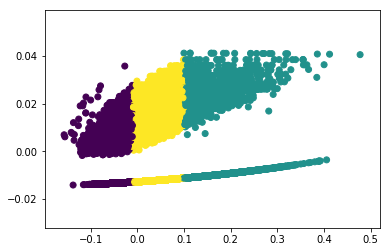

In [130]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [131]:
Kmean.cluster_centers_

array([[-5.24091557e-02,  9.75154704e-05],
       [ 1.64337775e-01,  1.38178628e-03],
       [ 3.46577591e-02, -6.90305316e-04]])

In [132]:
Kmean.labels_

array([0, 0, 0, ..., 1, 2, 0], dtype=int32)

In [133]:
df['Labels'] = Kmean.labels_

In [134]:
df[df['Labels']==0][['gender','age','overall','pace']].describe()

,gender,age,overall,pace
count,16629.000000,16629.000000,16629.000000,16629.000000
mean,0.642973,48.369535,13130.401648,8.613014
std,0.479137,8.943210,8026.903087,1.457464
min,0.000000,20.000000,1.000000,3.250000
25%,0.000000,42.000000,6219.000000,7.600000
50%,1.000000,48.000000,12861.000000,8.450000
75%,1.000000,54.000000,19397.000000,9.420000
max,1.000000,81.000000,31856.000000,16.180000


In [135]:
df[df['Labels']==1][['gender','age','overall','pace']].describe()

,gender,age,overall,pace
count,3374.000000,3374.000000,3374.000000,3374.00000
mean,0.332247,27.447244,25000.792531,11.36840
std,0.471089,4.916321,6312.133764,1.89291
min,0.000000,18.000000,51.000000,6.20000
25%,0.000000,24.000000,22505.000000,10.08000
50%,0.000000,27.000000,26988.500000,11.35000
75%,1.000000,30.000000,29726.750000,12.73000
max,1.000000,52.000000,31931.000000,20.57000


In [136]:
df[df['Labels']==2][['gender','age','overall','pace']].describe()

,gender,age,overall,pace
count,9100.000000,9100.000000,9100.000000,9100.000000
mean,0.413736,35.929780,17845.588132,9.690308
std,0.492529,8.201055,9377.159734,2.062972
min,0.000000,19.000000,35.000000,5.120000
25%,0.000000,29.000000,9728.500000,8.070000
50%,0.000000,35.000000,19107.000000,9.350000
75%,1.000000,41.000000,26331.250000,11.130000
max,1.000000,73.000000,31925.000000,17.470000


We have three clusters with the statistics that describe them above. The fastest group happens to be the oldest with a mean age of 48, but with the most men. The youngest group was the slowest with a pace of 11.36 and an age of 27.4. It was also the smallest with only 3300 data points, vs 9100 and 16600 for the other two

/home/diegofvargas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


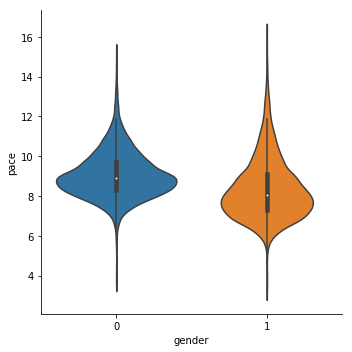

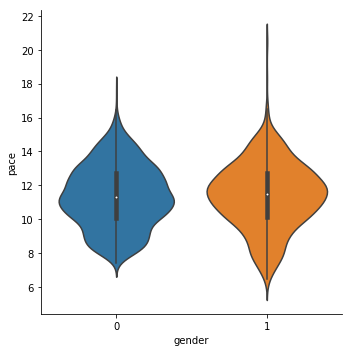

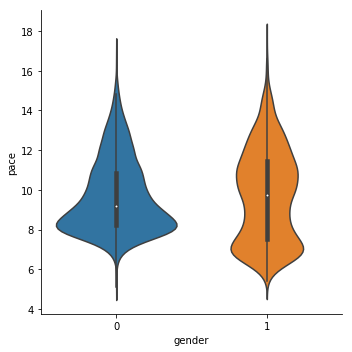

In [144]:
sns.catplot(data=df[df['Labels']==0], x='gender', y='pace', kind = 'violin')
sns.catplot(data=df[df['Labels']==1], x='gender', y='pace', kind = 'violin')
sns.catplot(data=df[df['Labels']==2], x='gender', y='pace', kind = 'violin')

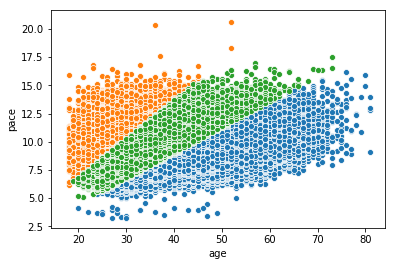

In [152]:
sns.scatterplot(data=df[df['Labels']==0], x='age', y='pace')
sns.scatterplot(data=df[df['Labels']==1], x='age', y='pace')
sns.scatterplot(data=df[df['Labels']==2], x='age', y='pace')

/home/diegofvargas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


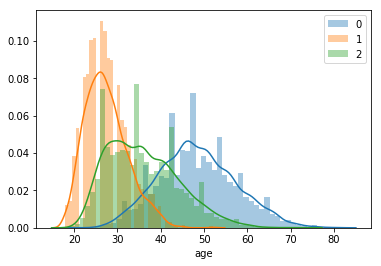

In [173]:
sns.distplot(df[df['Labels']==0]['age'])
sns.distplot(df[df['Labels']==1]['age'])
sns.distplot(df[df['Labels']==2]['age'])
plt.legend('012')

/home/diegofvargas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


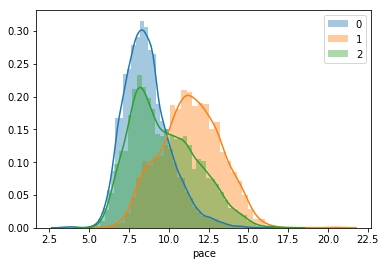

In [164]:
sns.distplot(df[df['Labels']==0]['pace'])
sns.distplot(df[df['Labels']==1]['pace'])
sns.distplot(df[df['Labels']==2]['pace'])
plt.legend('012')
plt.show()

Mean shift

In [117]:
from sklearn.cluster import MeanShift, estimate_bandwidth

Number of estimated clusters: 3


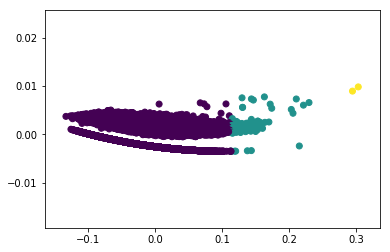

In [118]:
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_pca)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

Seems like the selection of 3 clusters was the right one, according to the mean shift algorithm. 